<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP__GRU%EB%A5%BC_%ED%86%B5%ED%95%9C_%ED%95%AD%EA%B3%B5_%EC%8A%B9%EA%B0%9D_%EC%88%98_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

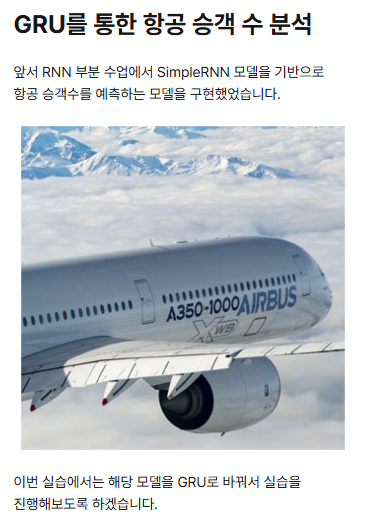

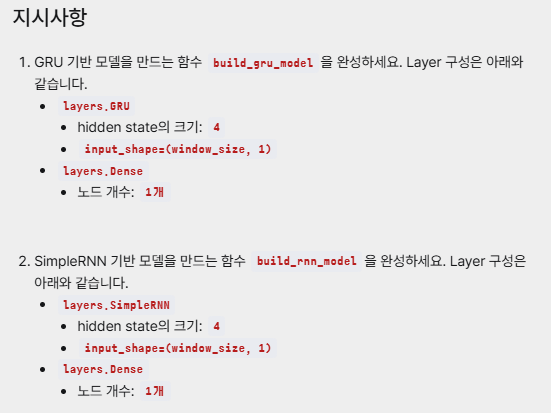

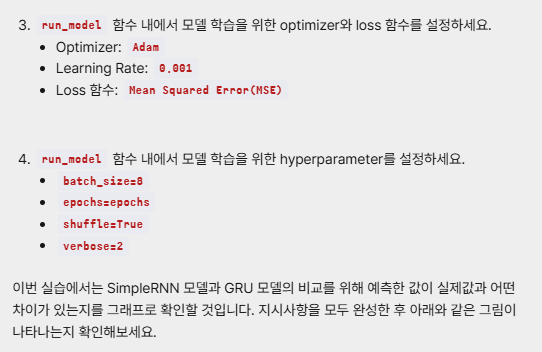

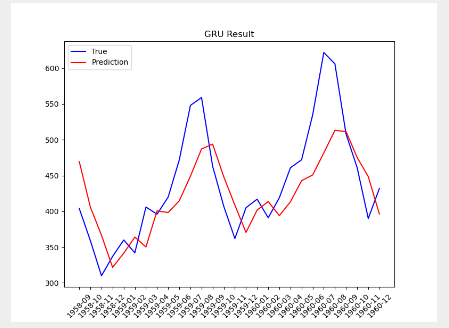

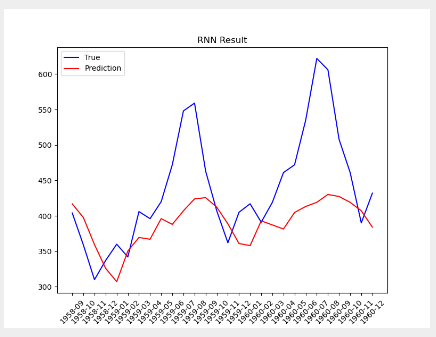

In [ ]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(window_size):
    raw_data = pd.read_csv("./airline-passengers.csv")
    raw_passengers = raw_data["Passengers"].to_numpy()

    # 데이터의 평균과 표준편차 값으로 정규화(표준화) 합니다.
    mean_passenger = raw_passengers.mean()
    stdv_passenger = raw_passengers.std(ddof=0)
    raw_passengers = (raw_passengers - mean_passenger) / stdv_passenger
    plot_data = {"month": raw_data["Month"], "mean": mean_passenger, "stdv": stdv_passenger}

    # window_size 개의 데이터를 불러와 입력 데이터(X)로 설정하고
    # window_size보다 한 시점 뒤의 데이터를 예측할 대상(y)으로 설정하여
    # 데이터셋을 구성합니다.
    X, y = [], []
    for i in range(len(raw_passengers) - window_size):
        cur_passenger = raw_passengers[i:i + window_size]
        target = raw_passengers[i + window_size]

        X.append(list(cur_passenger))
        y.append(target)

    # X와 y를 numpy array로 변환합니다.
    X = np.array(X)
    y = np.array(y)

    # 각 입력 데이터는 sequence 길이가 window_size이고, featuer 개수는 1개가 되도록
    # 마지막에 새로운 차원을 추가합니다.
    # 즉, (전체 데이터 개수, window_size) -> (전체 데이터 개수, window_size, 1)이 되도록 변환합니다.
    X = X[:, :, np.newaxis]

    # 학습 데이터는 전체 데이터의 80%, 테스트 데이터는 20%로 설정합니다.
    total_len = len(X)
    train_len = int(total_len * 0.8)

    X_train, y_train = X[:train_len], y[:train_len]
    X_test, y_test = X[train_len:], y[train_len:]

    return X_train, X_test, y_train, y_test, plot_data

def build_gru_model(window_size):
    model = Sequential()

    # TODO: [지시사항 1번] GRU 기반 모델을 구성하세요.
    model.add(layers.GRU(4, input_shape=(window_size, 1)))
    model.add(layers.Dense(1))

    return model

def build_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 2번] SimpleRNN 기반 모델을 구성하세요.
    model.add(layers.SimpleRNN(4, input_shape=(window_size, 1)))
    model.add(layers.Dense(1))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=100, name=None):
    # TODO: [지시사항 3번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=8, shuffle=True, verbose=2)

    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 MSE: {:.5f}".format(test_loss))
    print()

    return optimizer, hist

def plot_result(model, X_true, y_true, plot_data, name):
    y_pred = model.predict(X_true)

    # 표준화된 결과를 다시 원래 값으로 변환합니다.
    y_true_orig = (y_true * plot_data["stdv"]) + plot_data["mean"]
    y_pred_orig = (y_pred * plot_data["stdv"]) + plot_data["mean"]

    # 테스트 데이터에서 사용한 날짜들만 가져옵니다.
    test_month = plot_data["month"][-len(y_true):]

    # 모델의 예측값을 실제값과 함께 그래프로 그립니다.
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.plot(y_true_orig, color="b", label="True")
    ax.plot(y_pred_orig, color="r", label="Prediction")
    ax.set_xticks(list(range(len(test_month))))
    ax.set_xticklabels(test_month, rotation=45)
    ax.set_title("{} Result".format(name))
    ax.legend(loc="upper left")
    plt.savefig("airline_{}.png".format(name.lower()))

def main():
    tf.random.set_seed(2022)

    window_size = 4
    X_train, X_test, y_train, y_test, plot_data = load_data(window_size)

    gru_model = build_gru_model(window_size)
    run_model(gru_model, X_train, X_test, y_train, y_test, name="GRU")
    plot_result(gru_model, X_test, y_test, plot_data, name="GRU")

    rnn_model = build_rnn_model(window_size)
    run_model(rnn_model, X_train, X_test, y_train, y_test, name="RNN")
    plot_result(rnn_model, X_test, y_test, plot_data, name="RNN")

    elice_utils.send_image("airline_{}.png".format("gru"))
    elice_utils.send_image("airline_{}.png".format("rnn"))


if __name__ == "__main__":
    main()


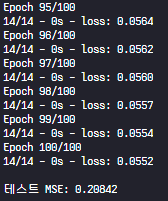

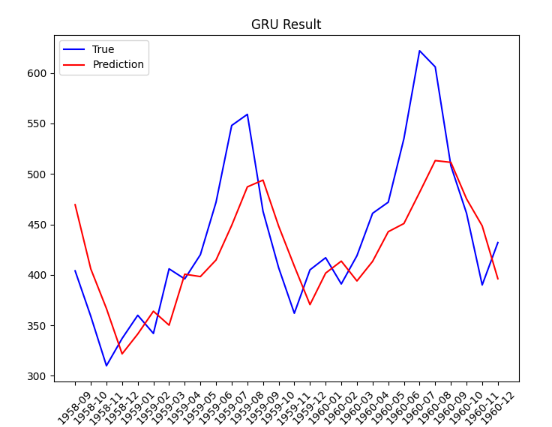

GRU 가 실제 데이터를 잘 따라가는 것을 볼 수 있다

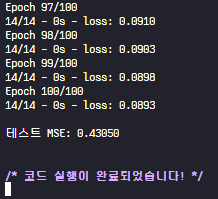

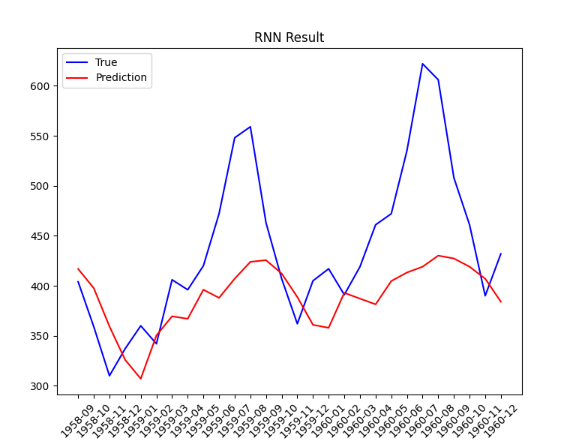